# Dependencies

In [19]:
library(ggplot2)

# Load Data

Source: https://gml.noaa.gov/ccgg/trends/data.html

Below we load the daily average from 1974 to 2024

In [12]:
url <- "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_daily_mlo.txt"

data <- read.delim(url,
    comment.char = "#",
    header = FALSE,
    sep = "",
    col.names = c("YY", "MM", "DD", "Decimal", "CO2_PPM")
)

str(data)

'data.frame':	15327 obs. of  5 variables:
 $ YY     : int  1974 1974 1974 1974 1974 1974 1974 1974 1974 1974 ...
 $ MM     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ DD     : int  17 18 19 20 21 22 23 26 27 28 ...
 $ Decimal: num  1974 1974 1974 1974 1974 ...
 $ CO2_PPM: num  333 333 333 334 334 ...


# Clean Data

Check for na-values.

> Due to the eruption of the Mauna Loa Volcano, measurements from Mauna Loa Observatory were suspended as of Nov. 29, 2022 and resumed in July 2023. Observations starting from December 2022 to July 4, 2023 are from a site at the Maunakea Observatories, approximately 21 miles north of the Mauna Loa Observatory.

What do we do about this? Missing data for the days 2022-11-29 to 2022-11-7.

There also seems to be a couple of periods where we have a couple of missing measurements, e.g. 2023-7-11 to 2023-7-12.

These missing values are probably negligble since we have roughly 15 K datapoints

In [17]:
# Create a Date column in the data frame
data$Date <- as.Date(with(data, paste(YY, MM, DD, sep="-")), format="%Y-%m-%d")

# Create a sequence of dates from the start to the end of your dataset
start_date <- min(data$Date)
end_date <- max(data$Date)
all_dates <- seq(from = start_date, to = end_date, by = "day")

# Identify the missing dates
missing_dates <- setdiff(all_dates, data$Date)

# Num. of na-values
num_of_na <- which(is.na(data))

# Print the missing dates
print("No. of dates in dataset:")
print(nrow(data))
print("No. of dates from 1974-5-17 to 2024-4-18 should be:")
print(length(all_dates))
print("No. of missing dates:")
print(length(missing_dates))
print("No. of na-values:")
print(num_of_na)

[1] "No. of dates in dataset:"
[1] 15327
[1] "No. of dates from 1974-5-17 to 2024-4-18 should be:"


[1] 18235
[1] "No. of missing dates:"
[1] 2908
[1] "No. of na-values:"
integer(0)


# Initial Plot of the Time Series

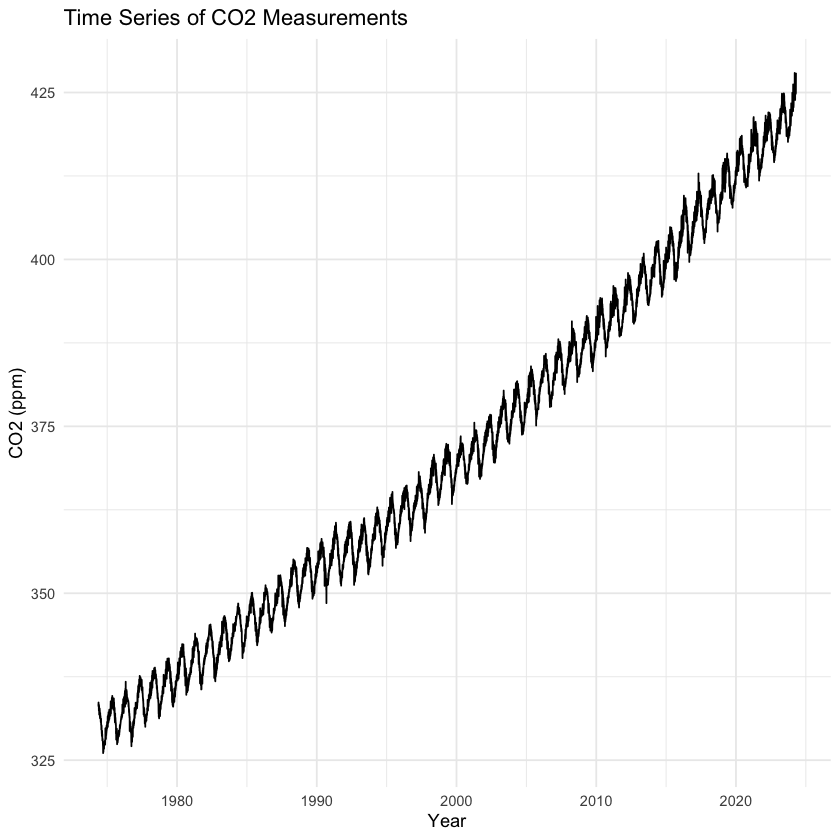

In [20]:
# Simple time series plot with ggplot2
ggplot(data, aes(x = Date, y = CO2_PPM)) +
  geom_line() +
  labs(title = "Time Series of CO2 Measurements",
       x = "Year",
       y = "CO2 (ppm)") +
  theme_minimal()